<a href="https://colab.research.google.com/github/alefaurelio/Metricas_avaliacao_aprendizado/blob/main/Metricas_Avaliacao_Aprendizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!pip install tensorflow scikit-learn matplotlib

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [30]:
# Carregar o dataset MNIST (dígitos de 0 a 9)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalização dos dados (0 a 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Codificar as classes (One-Hot Encoding)
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Criar a rede neural simples
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
model.fit(x_train, y_train_cat, epochs=5, batch_size=32, validation_split=0.1)

# Fazer previsões no conjunto de teste
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8701 - loss: 0.4600 - val_accuracy: 0.9648 - val_loss: 0.1270
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9623 - loss: 0.1305 - val_accuracy: 0.9743 - val_loss: 0.0939
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9736 - loss: 0.0872 - val_accuracy: 0.9768 - val_loss: 0.0839
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9809 - loss: 0.0652 - val_accuracy: 0.9783 - val_loss: 0.0782
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9866 - loss: 0.0439 - val_accuracy: 0.9807 - val_loss: 0.0701
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


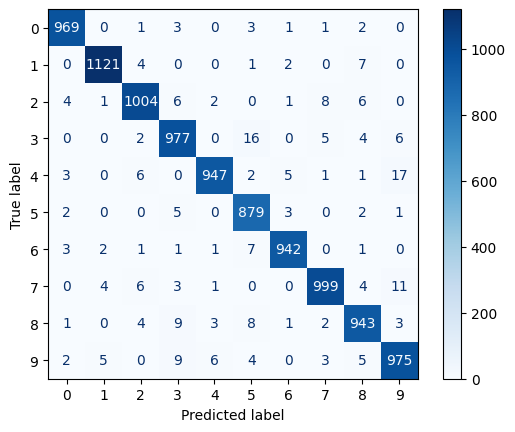

In [28]:
# Gerar a matriz de confusão completa (classes 0 a 9)
cm = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [39]:
# Cálculo das métricas
for i in range (10):
  VP = cm[i, i]
  FP = cm[:, i].sum() - VP
  FN = cm[i, :].sum() - VP
  VN = cm.sum() - (VP + FP + FN)

  Acuracia = (VP + VN) / (VP + FP + FN + VN)
  Sensibilidade = VP / (VP + FN) if (VP + FN) != 0 else 0
  Especificidade = VN / (VN + FP) if (VN + FP) != 0 else 0
  Precisao = VP / (VP + FP) if (VP + FP) != 0 else 0
  F1_Score = 2 * (Precisao * Sensibilidade) / (Precisao + Sensibilidade) if (Precisao + Sensibilidade) != 0 else 0

  # Exibir os resultados
  print(f"Classe {i}:")
  print(f"  VP={VP}, FP={FP}, FN={FN}, VN={VN}")
  print(f"  Acurácia       = {Acuracia:.4f}")
  print(f"  Sensibilidade  = {Sensibilidade:.4f}")
  print(f"  Especificidade = {Especificidade:.4f}")
  print(f"  Precisão       = {Precisao:.4f}")
  print(f"  F1-Score       = {F1_Score:.4f}")

Classe 0:
  VP=969, FP=15, FN=11, VN=9005
  Acurácia       = 0.9974
  Sensibilidade  = 0.9888
  Especificidade = 0.9983
  Precisão       = 0.9848
  F1-Score       = 0.9868
Classe 1:
  VP=1121, FP=12, FN=14, VN=8853
  Acurácia       = 0.9974
  Sensibilidade  = 0.9877
  Especificidade = 0.9986
  Precisão       = 0.9894
  F1-Score       = 0.9885
Classe 2:
  VP=1004, FP=24, FN=28, VN=8944
  Acurácia       = 0.9948
  Sensibilidade  = 0.9729
  Especificidade = 0.9973
  Precisão       = 0.9767
  F1-Score       = 0.9748
Classe 3:
  VP=977, FP=36, FN=33, VN=8954
  Acurácia       = 0.9931
  Sensibilidade  = 0.9673
  Especificidade = 0.9960
  Precisão       = 0.9645
  F1-Score       = 0.9659
Classe 4:
  VP=947, FP=13, FN=35, VN=9005
  Acurácia       = 0.9952
  Sensibilidade  = 0.9644
  Especificidade = 0.9986
  Precisão       = 0.9865
  F1-Score       = 0.9753
Classe 5:
  VP=879, FP=41, FN=13, VN=9067
  Acurácia       = 0.9946
  Sensibilidade  = 0.9854
  Especificidade = 0.9955
  Precisão       =